# Testing
$y = f(X)$

In [96]:
import os
import re
import csv
import glob
import pandas as pd
from enum import Enum

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

step = 30000

Health = ["Без заикания", "До лечения", "Во время лечения"]

def dists(v):
    mean = np.mean(v)
    return np.array([np.linalg.norm(x - mean) for x in v])

class EyeDat:

    """ The class that handles the dataset """
    def __init__(self, health, exp, trial):
        self.health = health
        self.exp = exp
        patients = os.listdir("./Данные айтрекера/{}/".format(health))
        fnames = [(glob.glob("./*/{}/{}/Fix*_{}*".format(health, pat, exp))[0], glob.glob("./*/{}/{}/Simple*_{}*".format(health, pat, exp))[0]) for pat in patients]
        df_s = [(pd.read_csv(n[0], delim_whitespace =1, decimal=',',usecols=["CURRENT_FIX_START","CURRENT_FIX_END","CURRENT_FIX_X","CURRENT_FIX_Y","CURRENT_FIX_DURATION"]),
                 pd.read_csv(n[1], delim_whitespace =1, decimal=',',usecols=["LEFT_GAZE_X","LEFT_GAZE_Y","RIGHT_GAZE_X","RIGHT_GAZE_Y"])) for n in fnames]        
        disps = self.get_disps(df_s)
        self.df = [f[0] for f in df_s ]
        self.disps = disps


    def get_disps(self,df_s):
        disps = []
        for fixs,simp in df_s:
            df = simp.loc[:,(simp != '.').any(axis=0)]
            df = df.loc[:, (df != '.').any(axis=0)]
            df = df.stack().str.replace(',','.').unstack()
            df = df[df[df.columns[0]]!='.'].astype(float)
            simp = df
            stepsize = len(simp)/int(fixs.tail(1)["CURRENT_FIX_END"])            
            for rec in fixs[["CURRENT_FIX_START","CURRENT_FIX_END"]].itertuples():
                fixation = np.asarray(simp[int(stepsize*rec[1]):int(stepsize*rec[2])])                
                disps.append(dists(fixation).var())

        return disps

    def hist_calc(self, axes):
#         mean = np.array((self.df["CURRENT_FIX_X"].mean(), self.df["CURRENT_FIX_Y"].mean()))
#         pairs = ([np.linalg.norm(x - mean) for x in np.array((self.df["CURRENT_FIX_X"],self.df["CURRENT_FIX_Y"])).transpose()],self.df["CURRENT_FIX_DURATION"])
        pairs = (self.disps, self.df["CURRENT_FIX_DURATION"])
        axes.scatter(pairs[0],pairs[1], s = 4)
        axes.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        if self.exp == 1 : axes.set_ylabel(self.health)
        if self.health == "Во время лечения" : axes.set_xlabel("Эксперимент "+ str(self.exp))
        return pairs


In [41]:
patients = os.listdir("./Данные айтрекера/{}/".format(Health[0]))
fnames = [(glob.glob("./*/{}/{}/Fix*_{}*".format(Health[0],pat , 4))[0], glob.glob("./*/{}/{}/Simple*_{}*".format(Health[0], pat, 4))[0]) for pat in patients]
fnames[0][0]

'./Данные айтрекера/Без заикания/633 Новожилов/Fix_Nov_4.xls'

In [70]:
stats.variation([1,1,1,1,2])

0.33333333333333337

In [95]:
D = EyeDat(Health[0],1,1)

0.49396717242183563
84.5702103926
6360000 11040000
9018.6563647
11820000 19620000
12245.4616363
20760000 27420000
3057.36074376
28560000 34440000
45158.8439988
35520000 41040000
6781.36888183
43020000 50580000
2403.62731387
51840000 61440000
2335.95912171
62460000 67620000
4449.93474625
68700000 79080000
1189.62811184
80580000 86460000
5912.29722811
87540000 99240000
2807.51843683
100440000 113040000
1108.9198636
114120000 119640000
13228.3945689
120600000 127440000
290.25357626
128700000 135000000
1559.90706446
135900000 140580000
5016.33667059
141660000 156240000
2817.69389052
157200000 163740000
373.617389968
165540000 174960000
1552.54831587
175860000 182040000
88.3924037157
183240000 201720000
3340.02564676
202740000 208320000
2336.85189617
209400000 218040000
751.865955186
219240000 229500000
347.153589578
230580000 251520000
152.558673594
252660000 263280000
27.9337342038
265260000 269400000
8.09033908319
270480000 280980000
70.9665755013
282360000 305520000
42.0699187109
306720

In [97]:
df = D.df[0]
int(df.tail(1)["CURRENT_FIX_END"])

480206

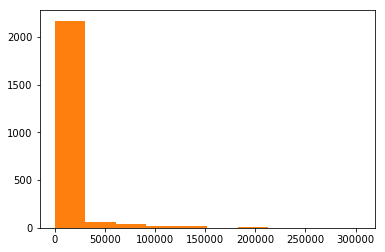

In [100]:
plt.hist(D.disps)
plt.show()